In [1]:
# COMPANY_DATA


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [3]:
from google.colab import files
uploaded=files.upload()

Saving Company_Data.csv to Company_Data.csv


In [4]:
company=pd.read_csv('Company_Data.csv')
company

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0     9.50        138      73           11         276    120       Bad   42   
1    11.22        111      48           16         260     83      Good   65   
2    10.06        113      35           10         269     80    Medium   59   
3     7.40        117     100            4         466     97    Medium   55   
4     4.15        141      64            3         340    128       Bad   38   
..     ...        ...     ...          ...         ...    ...       ...  ...   
395  12.57        138     108           17         203    128      Good   33   
396   6.14        139      23            3          37    120    Medium   55   
397   7.41        162      26           12         368    159    Medium   40   
398   5.94        100      79            7         284     95       Bad   50   
399   9.71        134      37            0          27    120      Good   49   

     Education Urban   US  
0           17   Yes  Yes  
1           10   Yes  Yes  
2           12   Yes  Yes  
3           14   Yes  Yes  
4           13   Yes   No  
..         ...   ...  ...  
395         14   Yes  Yes  
396         11    No  Yes  
397         18   Yes  Yes  
398         12   Yes  Yes  
399         16   Yes  Yes  

[400 rows x 11 columns]

In [5]:
company.shape

(400, 11)

In [6]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [7]:
company.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

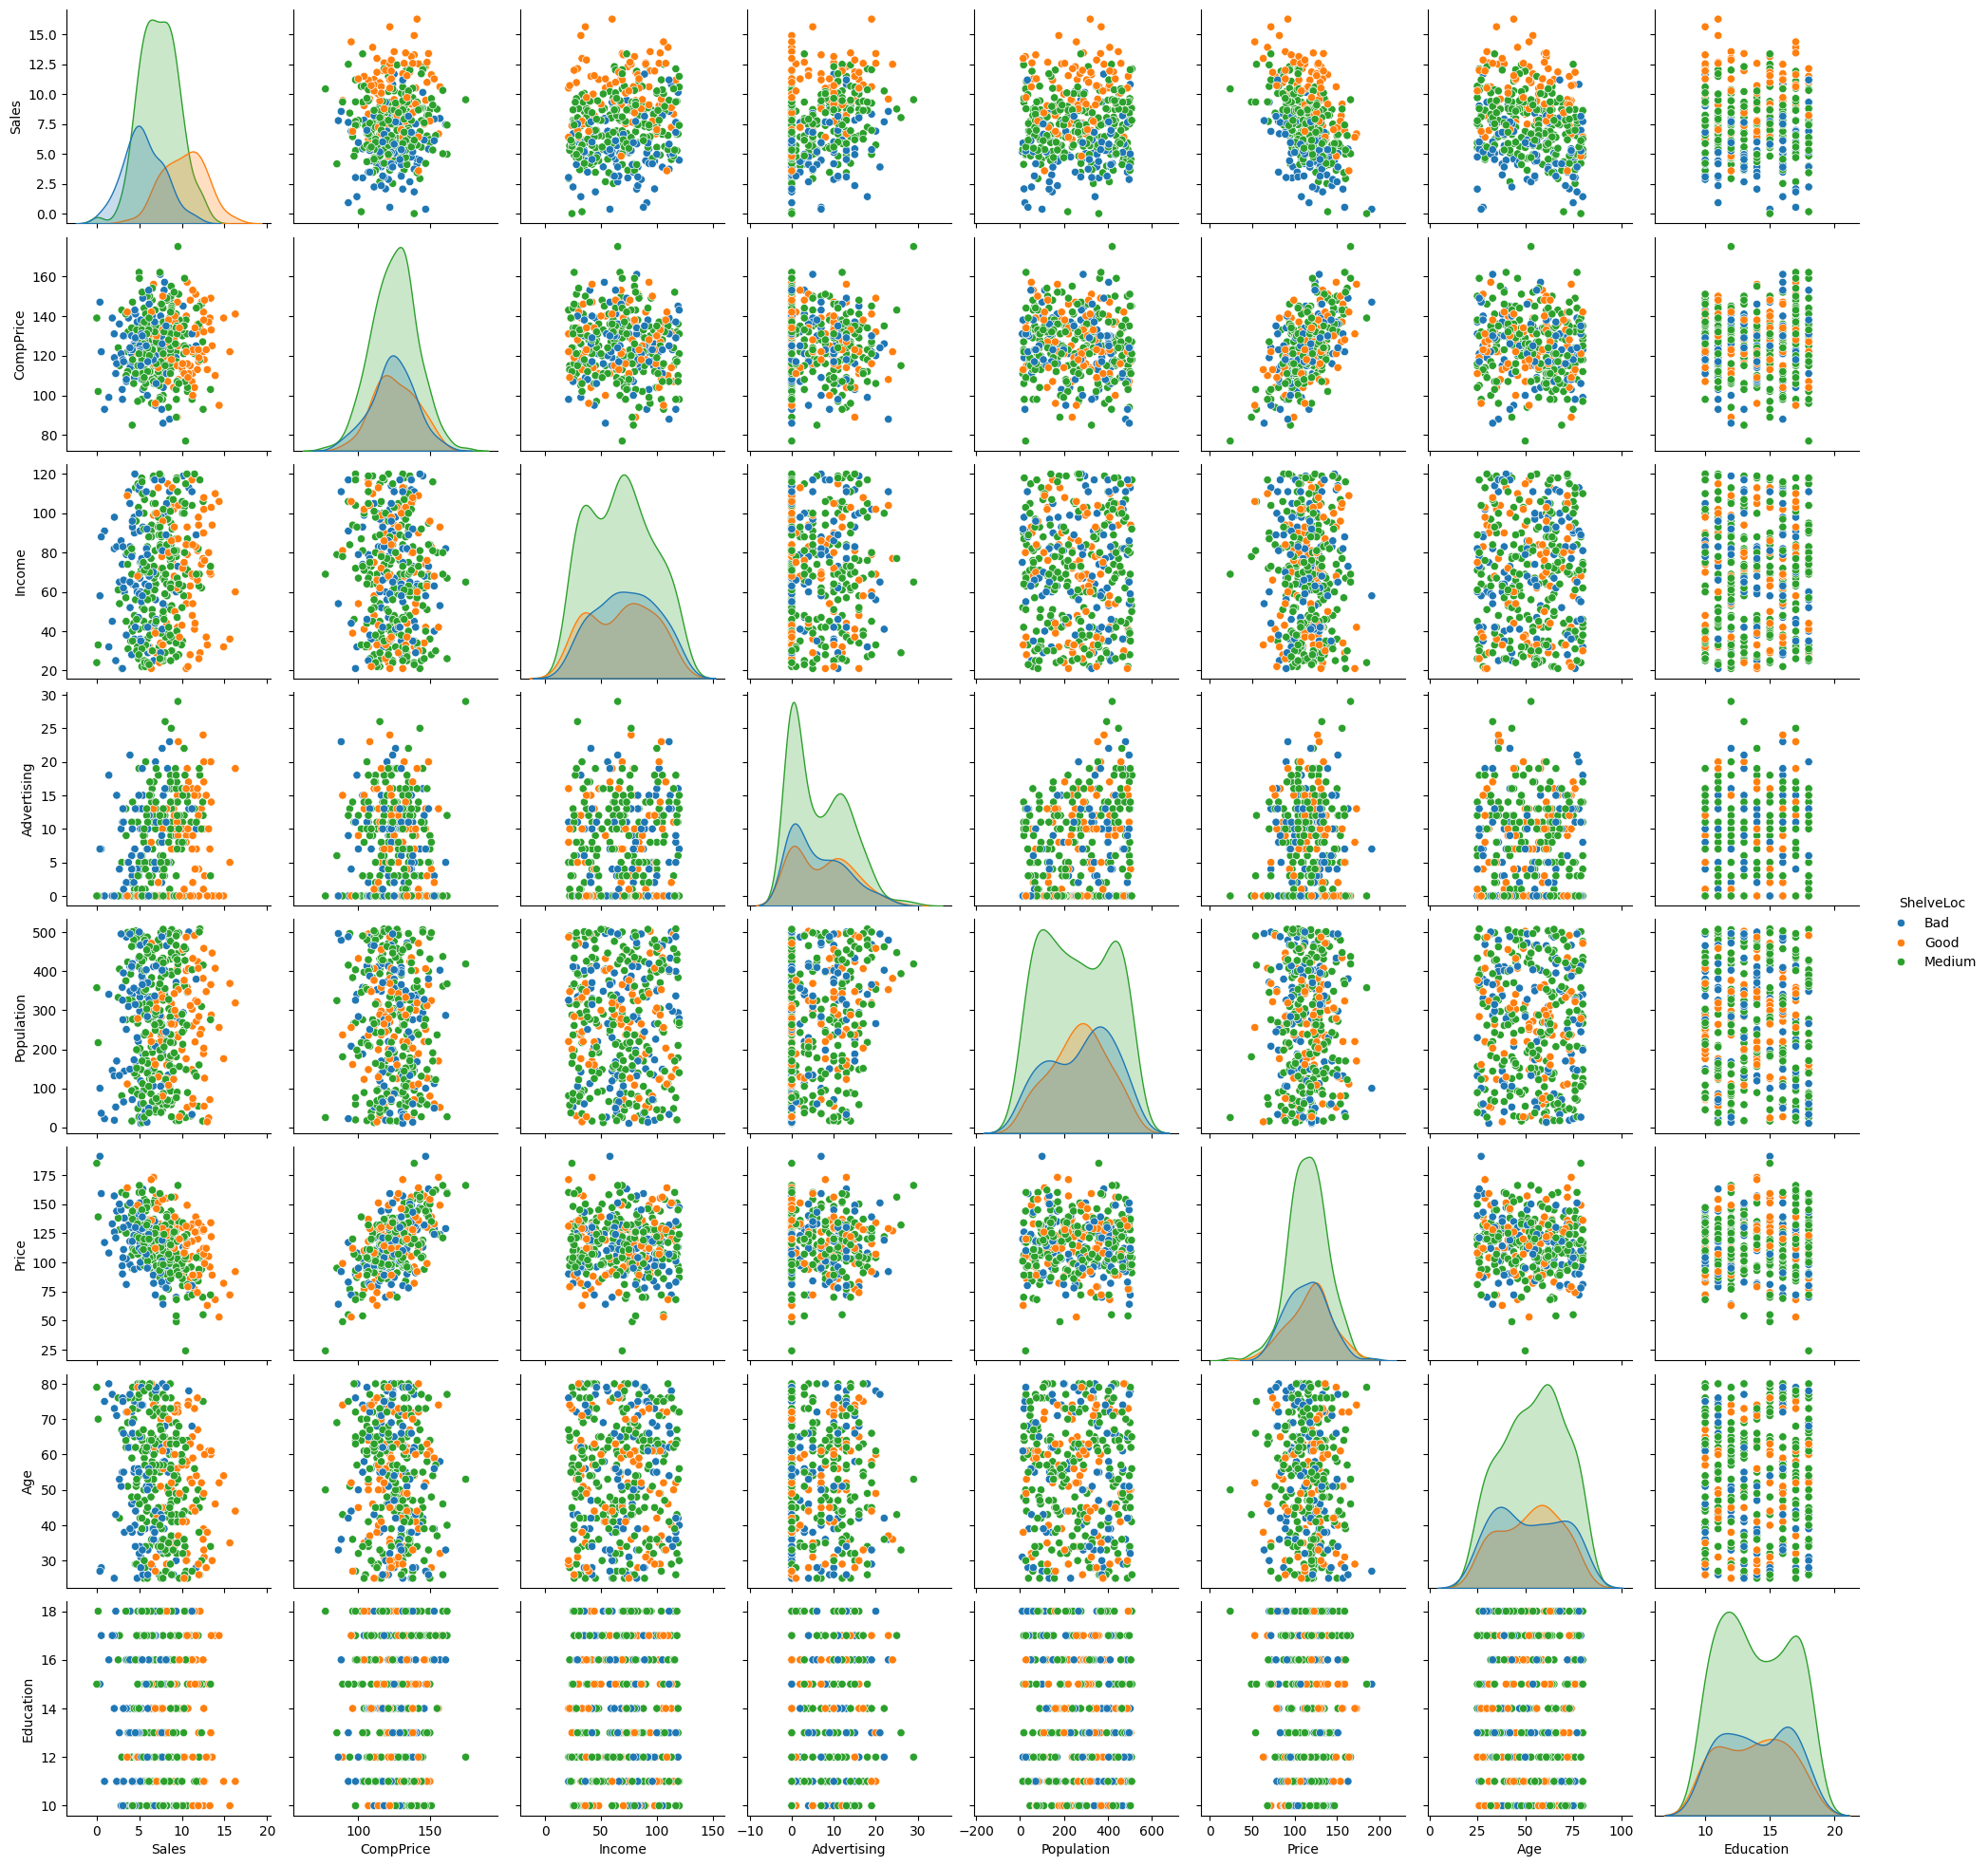

In [8]:
sns.pairplot(data=company, hue = 'ShelveLoc')

In [9]:
df=pd.get_dummies(company,columns=['Urban','US'],drop_first=True)

In [10]:
df

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0     9.50        138      73           11         276    120       Bad   42   
1    11.22        111      48           16         260     83      Good   65   
2    10.06        113      35           10         269     80    Medium   59   
3     7.40        117     100            4         466     97    Medium   55   
4     4.15        141      64            3         340    128       Bad   38   
..     ...        ...     ...          ...         ...    ...       ...  ...   
395  12.57        138     108           17         203    128      Good   33   
396   6.14        139      23            3          37    120    Medium   55   
397   7.41        162      26           12         368    159    Medium   40   
398   5.94        100      79            7         284     95       Bad   50   
399   9.71        134      37            0          27    120      Good   49   

     Education  Urban_Yes  US_Yes  
0           17          1       1  
1           10          1       1  
2           12          1       1  
3           14          1       1  
4           13          1       0  
..         ...        ...     ...  
395         14          1       1  
396         11          0       1  
397         18          1       1  
398         12          1       1  
399         16          1       1  

[400 rows x 11 columns]

In [11]:
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

In [12]:
df['ShelveLoc']=df['ShelveLoc'].map({'Good':1,'Medium':2,'Bad':3})


In [13]:
df.head()

Sales  CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
0   9.50        138      73           11         276    120          3   42   
1  11.22        111      48           16         260     83          1   65   
2  10.06        113      35           10         269     80          2   59   
3   7.40        117     100            4         466     97          2   55   
4   4.15        141      64            3         340    128          3   38   

   Education  Urban_Yes  US_Yes  
0         17          1       1  
1         10          1       1  
2         12          1       1  
3         14          1       1  
4         13          1       0

In [14]:
x=df.iloc[:,0:6]
y=df['ShelveLoc']
x


Sales  CompPrice  Income  Advertising  Population  Price
0     9.50        138      73           11         276    120
1    11.22        111      48           16         260     83
2    10.06        113      35           10         269     80
3     7.40        117     100            4         466     97
4     4.15        141      64            3         340    128
..     ...        ...     ...          ...         ...    ...
395  12.57        138     108           17         203    128
396   6.14        139      23            3          37    120
397   7.41        162      26           12         368    159
398   5.94        100      79            7         284     95
399   9.71        134      37            0          27    120

[400 rows x 6 columns]

In [15]:
x=df.iloc[:,0:6]
y=df['ShelveLoc']
x


Sales  CompPrice  Income  Advertising  Population  Price
0     9.50        138      73           11         276    120
1    11.22        111      48           16         260     83
2    10.06        113      35           10         269     80
3     7.40        117     100            4         466     97
4     4.15        141      64            3         340    128
..     ...        ...     ...          ...         ...    ...
395  12.57        138     108           17         203    128
396   6.14        139      23            3          37    120
397   7.41        162      26           12         368    159
398   5.94        100      79            7         284     95
399   9.71        134      37            0          27    120

[400 rows x 6 columns]

In [16]:
y

0      3
1      1
2      2
3      2
4      3
      ..
395    1
396    2
397    2
398    3
399    1
Name: ShelveLoc, Length: 400, dtype: int64

In [17]:
df['ShelveLoc'].unique()


array([3, 1, 2])

In [18]:
df['ShelveLoc'].value_counts()


2    219
3     96
1     85
Name: ShelveLoc, dtype: int64

In [19]:
df.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban_Yes', 'US_Yes'],
      dtype='object')

In [20]:
df.describe

<bound method NDFrame.describe of      Sales  CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
0     9.50        138      73           11         276    120          3   42   
1    11.22        111      48           16         260     83          1   65   
2    10.06        113      35           10         269     80          2   59   
3     7.40        117     100            4         466     97          2   55   
4     4.15        141      64            3         340    128          3   38   
..     ...        ...     ...          ...         ...    ...        ...  ...   
395  12.57        138     108           17         203    128          1   33   
396   6.14        139      23            3          37    120          2   55   
397   7.41        162      26           12         368    159          2   40   
398   5.94        100      79            7         284     95          3   50   
399   9.71        134      37            0          27    120          1   49   

     Education  Urban_Yes  US_Yes  
0           17          1       1  
1           10          1       1  
2           12          1       1  
3           14          1       1  
4           13          1       0  
..         ...        ...     ...  
395         14          1       1  
396         11          0       1  
397         18          1       1  
398         12          1       1  
399         16          1       1  

[400 rows x 11 columns]>

In [21]:
# Labels are the values we want to predict
labels = np.array(df['Income'])
# Remove the labels from the features
# axis 1 refers to the columns
features= df.drop('Income', axis = 1)
# Saving feature names for later use
feature_list = list(df.columns)
# Convert to numpy array
features = np.array(df)


In [22]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=42)

In [23]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

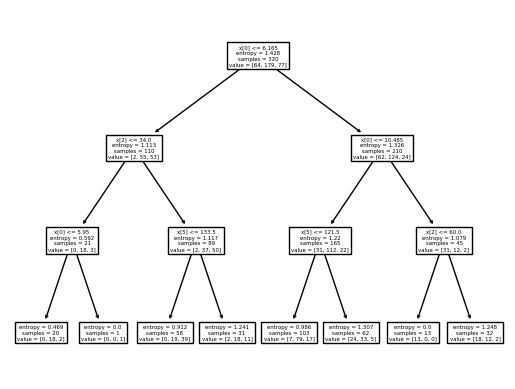

In [24]:
#PLot the decision tree
tree.plot_tree(model);

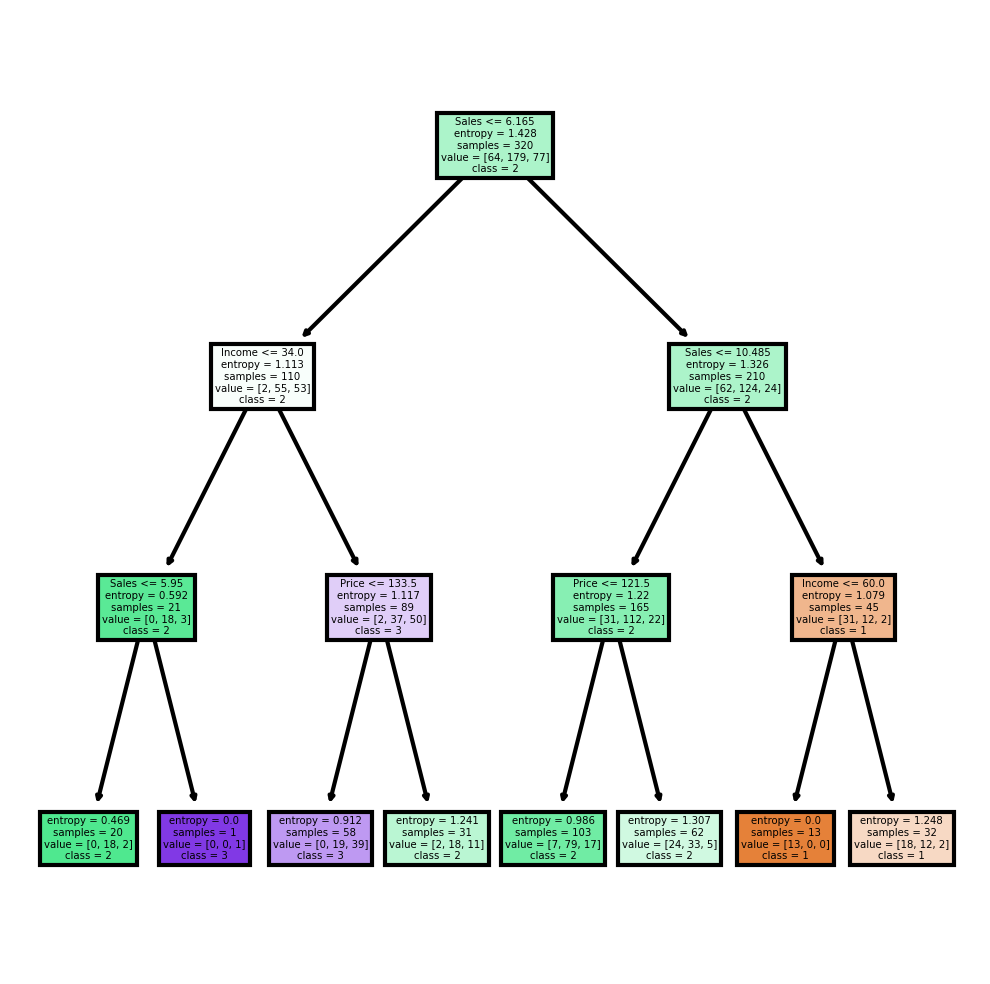

In [25]:
fn=['Sales','CompPrice','Income','Advertising','Population','Price']
cn=['1', '2', '3']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn,
               class_names=cn,
               filled = True);


In [26]:
text = tree.export_text(model,max_depth=3)
print(text)

|--- feature_0 <= 6.16
|   |--- feature_2 <= 34.00
|   |   |--- feature_0 <= 5.95
|   |   |   |--- class: 2
|   |   |--- feature_0 >  5.95
|   |   |   |--- class: 3
|   |--- feature_2 >  34.00
|   |   |--- feature_5 <= 133.50
|   |   |   |--- class: 3
|   |   |--- feature_5 >  133.50
|   |   |   |--- class: 2
|--- feature_0 >  6.16
|   |--- feature_0 <= 10.48
|   |   |--- feature_5 <= 121.50
|   |   |   |--- class: 2
|   |   |--- feature_5 >  121.50
|   |   |   |--- class: 2
|   |--- feature_0 >  10.48
|   |   |--- feature_2 <= 60.00
|   |   |   |--- class: 1
|   |   |--- feature_2 >  60.00
|   |   |   |--- class: 1



In [27]:
model.feature_importances_

array([0.65629732, 0.        , 0.14363525, 0.        , 0.        ,
       0.20006744])

In [28]:
import pandas as pd
feature_imp = pd.Series(model.feature_importances_,index=fn).sort_values(ascending=False)
feature_imp

Sales          0.656297
Price          0.200067
Income         0.143635
CompPrice      0.000000
Advertising    0.000000
Population     0.000000
dtype: float64

In [29]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set
pd.Series(preds).value_counts() # getting the count of each category

2    49
1    17
3    14
dtype: int64

In [30]:
preds

array([2, 2, 2, 3, 2, 2, 1, 2, 2, 1, 3, 2, 1, 3, 2, 2, 2, 1, 2, 3, 2, 2,
       3, 3, 2, 3, 2, 2, 2, 2, 1, 1, 3, 3, 1, 3, 3, 2, 1, 2, 2, 2, 1, 1,
       1, 2, 2, 2, 2, 2, 1, 2, 3, 2, 2, 2, 3, 2, 1, 2, 2, 1, 2, 2, 2, 2,
       1, 2, 2, 1, 2, 3, 1, 2, 2, 2, 2, 2, 2, 2])

In [31]:
pd.crosstab(y_test,preds)

col_0       1   2   3
ShelveLoc            
1          13   8   0
2           3  27  10
3           1  14   4

In [32]:
# Accuracy
np.mean(preds==y_test)

0.55

### Building Decision Tree Classifier (CART) using Gini Criteria

In [33]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [34]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [35]:
#Prediction and computing the accuracy
pred=model.predict(x_test)
np.mean(preds==y_test)

0.55

In [36]:
model.feature_importances_

array([0.65629732, 0.        , 0.14363525, 0.        , 0.        ,
       0.20006744])


#### Decision Tree Regression Example

In [37]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

In [38]:
array = company.values
X = array[:,0:3]
y = array[:,3]

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [40]:
model = DecisionTreeRegressor(max_depth = 3)
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [41]:
#Find the testing accuracy
model.score(X_test,y_test)

-0.15554567378317596

In [42]:
#Find the training accuracy
model.score(X_train, y_train)

0.22129574656651751

xgboost

In [43]:
!pip install xgboost

In [44]:
# First XGBoost model for Pima Indians dataset
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from pandas import read_csv

In [45]:
array = company.values
X = array[:,0:3]
y = array[:,3]

In [46]:
# split data into train and test sets
seed = 42
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [47]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)

In [48]:
# fit model no training data
model = XGBClassifier(max_depth =6, n_estimators=500, learning_rate=0.03,gamma=0.5, objective='binary:logistic')
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.5, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.03, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [49]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [50]:
predictions

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 13,
 0,
 0,
 0,
 0,
 0,
 0,
 19,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 6,
 0,
 0,
 0,
 0,
 22,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 10,
 0,
 0,
 0,
 0,
 0,
 10,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 10,
 0,
 0,
 0,
 10,
 0,
 0,
 0,
 10,
 0,
 0,
 0,
 0,
 16,
 6,
 0,
 0,
 0,
 0,
 0,
 10,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

lgbm

In [51]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [52]:
!pip install lightgbm

In [53]:
import lightgbm as lgb
d_train = lgb.Dataset(x_train, label=y_train)

In [54]:
params = {}
params['learning_rate'] = 0.003
params['boosting_type'] = 'gbdt'
params['objective'] = 'binary'
params['metric'] = 'binary_logloss'
params['sub_feature'] = 0.5
params['num_leaves'] = 10
params['min_data'] = 50
params['max_depth'] = 10

In [55]:
clf = lgb.train(params, d_train, 500)

[LightGBM] [Info] Number of positive: 184, number of negative: 116
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000159 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 223
[LightGBM] [Info] Number of data points in the train set: 300, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.613333 -> initscore=0.461346
[LightGBM] [Info] Start training from score 0.461346
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

In [56]:
#Prediction
y_pred=clf.predict(x_test)

In [57]:
predictions = [round(value) for value in y_pred]

In [58]:
predictions

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [60]:
# FRAUD_CHECK


Use decision trees to prepare a model on fraud data
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

Data Description :

Undergrad : person is under graduated or not
Marital.Status : marital status of a person
Taxable.Income : Taxable income is the amount of how much tax an individual owes to the government
Work Experience : Work experience of an individual person
Urban : Whether that person belongs to urban area or not



# New Section

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing


In [62]:
from google.colab import files
uploaded =files.upload()

Saving Fraud_check.csv to Fraud_check.csv


In [63]:
fraud=pd.read_csv('Fraud_check.csv')
fraud

Undergrad Marital.Status  Taxable.Income  City.Population  \
0          NO         Single           68833            50047   
1         YES       Divorced           33700           134075   
2          NO        Married           36925           160205   
3         YES         Single           50190           193264   
4          NO        Married           81002            27533   
..        ...            ...             ...              ...   
595       YES       Divorced           76340            39492   
596       YES       Divorced           69967            55369   
597        NO       Divorced           47334           154058   
598       YES        Married           98592           180083   
599        NO       Divorced           96519           158137   

     Work.Experience Urban  
0                 10   YES  
1                 18   YES  
2                 30   YES  
3                 15   YES  
4                 28    NO  
..               ...   ...  
595                7   YES  
596                2   YES  
597                0   YES  
598               17    NO  
599               16    NO  

[600 rows x 6 columns]

In [64]:
fraud.shape

(600, 6)

In [65]:
fraud.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [66]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [67]:
df=pd.get_dummies(fraud,columns=['Undergrad','Marital.Status','Urban'], drop_first=True)


In [68]:
df

Taxable.Income  City.Population  Work.Experience  Undergrad_YES  \
0             68833            50047               10              0   
1             33700           134075               18              1   
2             36925           160205               30              0   
3             50190           193264               15              1   
4             81002            27533               28              0   
..              ...              ...              ...            ...   
595           76340            39492                7              1   
596           69967            55369                2              1   
597           47334           154058                0              0   
598           98592           180083               17              1   
599           96519           158137               16              0   

     Marital.Status_Married  Marital.Status_Single  Urban_YES  
0                         0                      1          1  
1                         0                      0          1  
2                         1                      0          1  
3                         0                      1          1  
4                         1                      0          0  
..                      ...                    ...        ...  
595                       0                      0          1  
596                       0                      0          1  
597                       0                      0          1  
598                       1                      0          0  
599                       0                      0          0  

[600 rows x 7 columns]

In [69]:
df["TaxInc"] = pd.cut(df["Taxable.Income"], bins = [10002,30000,99620], labels = ["Risky", "Good"])


In [70]:
df

Taxable.Income  City.Population  Work.Experience  Undergrad_YES  \
0             68833            50047               10              0   
1             33700           134075               18              1   
2             36925           160205               30              0   
3             50190           193264               15              1   
4             81002            27533               28              0   
..              ...              ...              ...            ...   
595           76340            39492                7              1   
596           69967            55369                2              1   
597           47334           154058                0              0   
598           98592           180083               17              1   
599           96519           158137               16              0   

     Marital.Status_Married  Marital.Status_Single  Urban_YES TaxInc  
0                         0                      1          1   Good  
1                         0                      0          1   Good  
2                         1                      0          1   Good  
3                         0                      1          1   Good  
4                         1                      0          0   Good  
..                      ...                    ...        ...    ...  
595                       0                      0          1   Good  
596                       0                      0          1   Good  
597                       0                      0          1   Good  
598                       1                      0          0   Good  
599                       0                      0          0   Good  

[600 rows x 8 columns]

In [71]:
df = pd.get_dummies(df,columns = ["TaxInc"],drop_first=True)

In [72]:
df

Taxable.Income  City.Population  Work.Experience  Undergrad_YES  \
0             68833            50047               10              0   
1             33700           134075               18              1   
2             36925           160205               30              0   
3             50190           193264               15              1   
4             81002            27533               28              0   
..              ...              ...              ...            ...   
595           76340            39492                7              1   
596           69967            55369                2              1   
597           47334           154058                0              0   
598           98592           180083               17              1   
599           96519           158137               16              0   

     Marital.Status_Married  Marital.Status_Single  Urban_YES  TaxInc_Good  
0                         0                      1          1            1  
1                         0                      0          1            1  
2                         1                      0          1            1  
3                         0                      1          1            1  
4                         1                      0          0            1  
..                      ...                    ...        ...          ...  
595                       0                      0          1            1  
596                       0                      0          1            1  
597                       0                      0          1            1  
598                       1                      0          0            1  
599                       0                      0          0            1  

[600 rows x 8 columns]

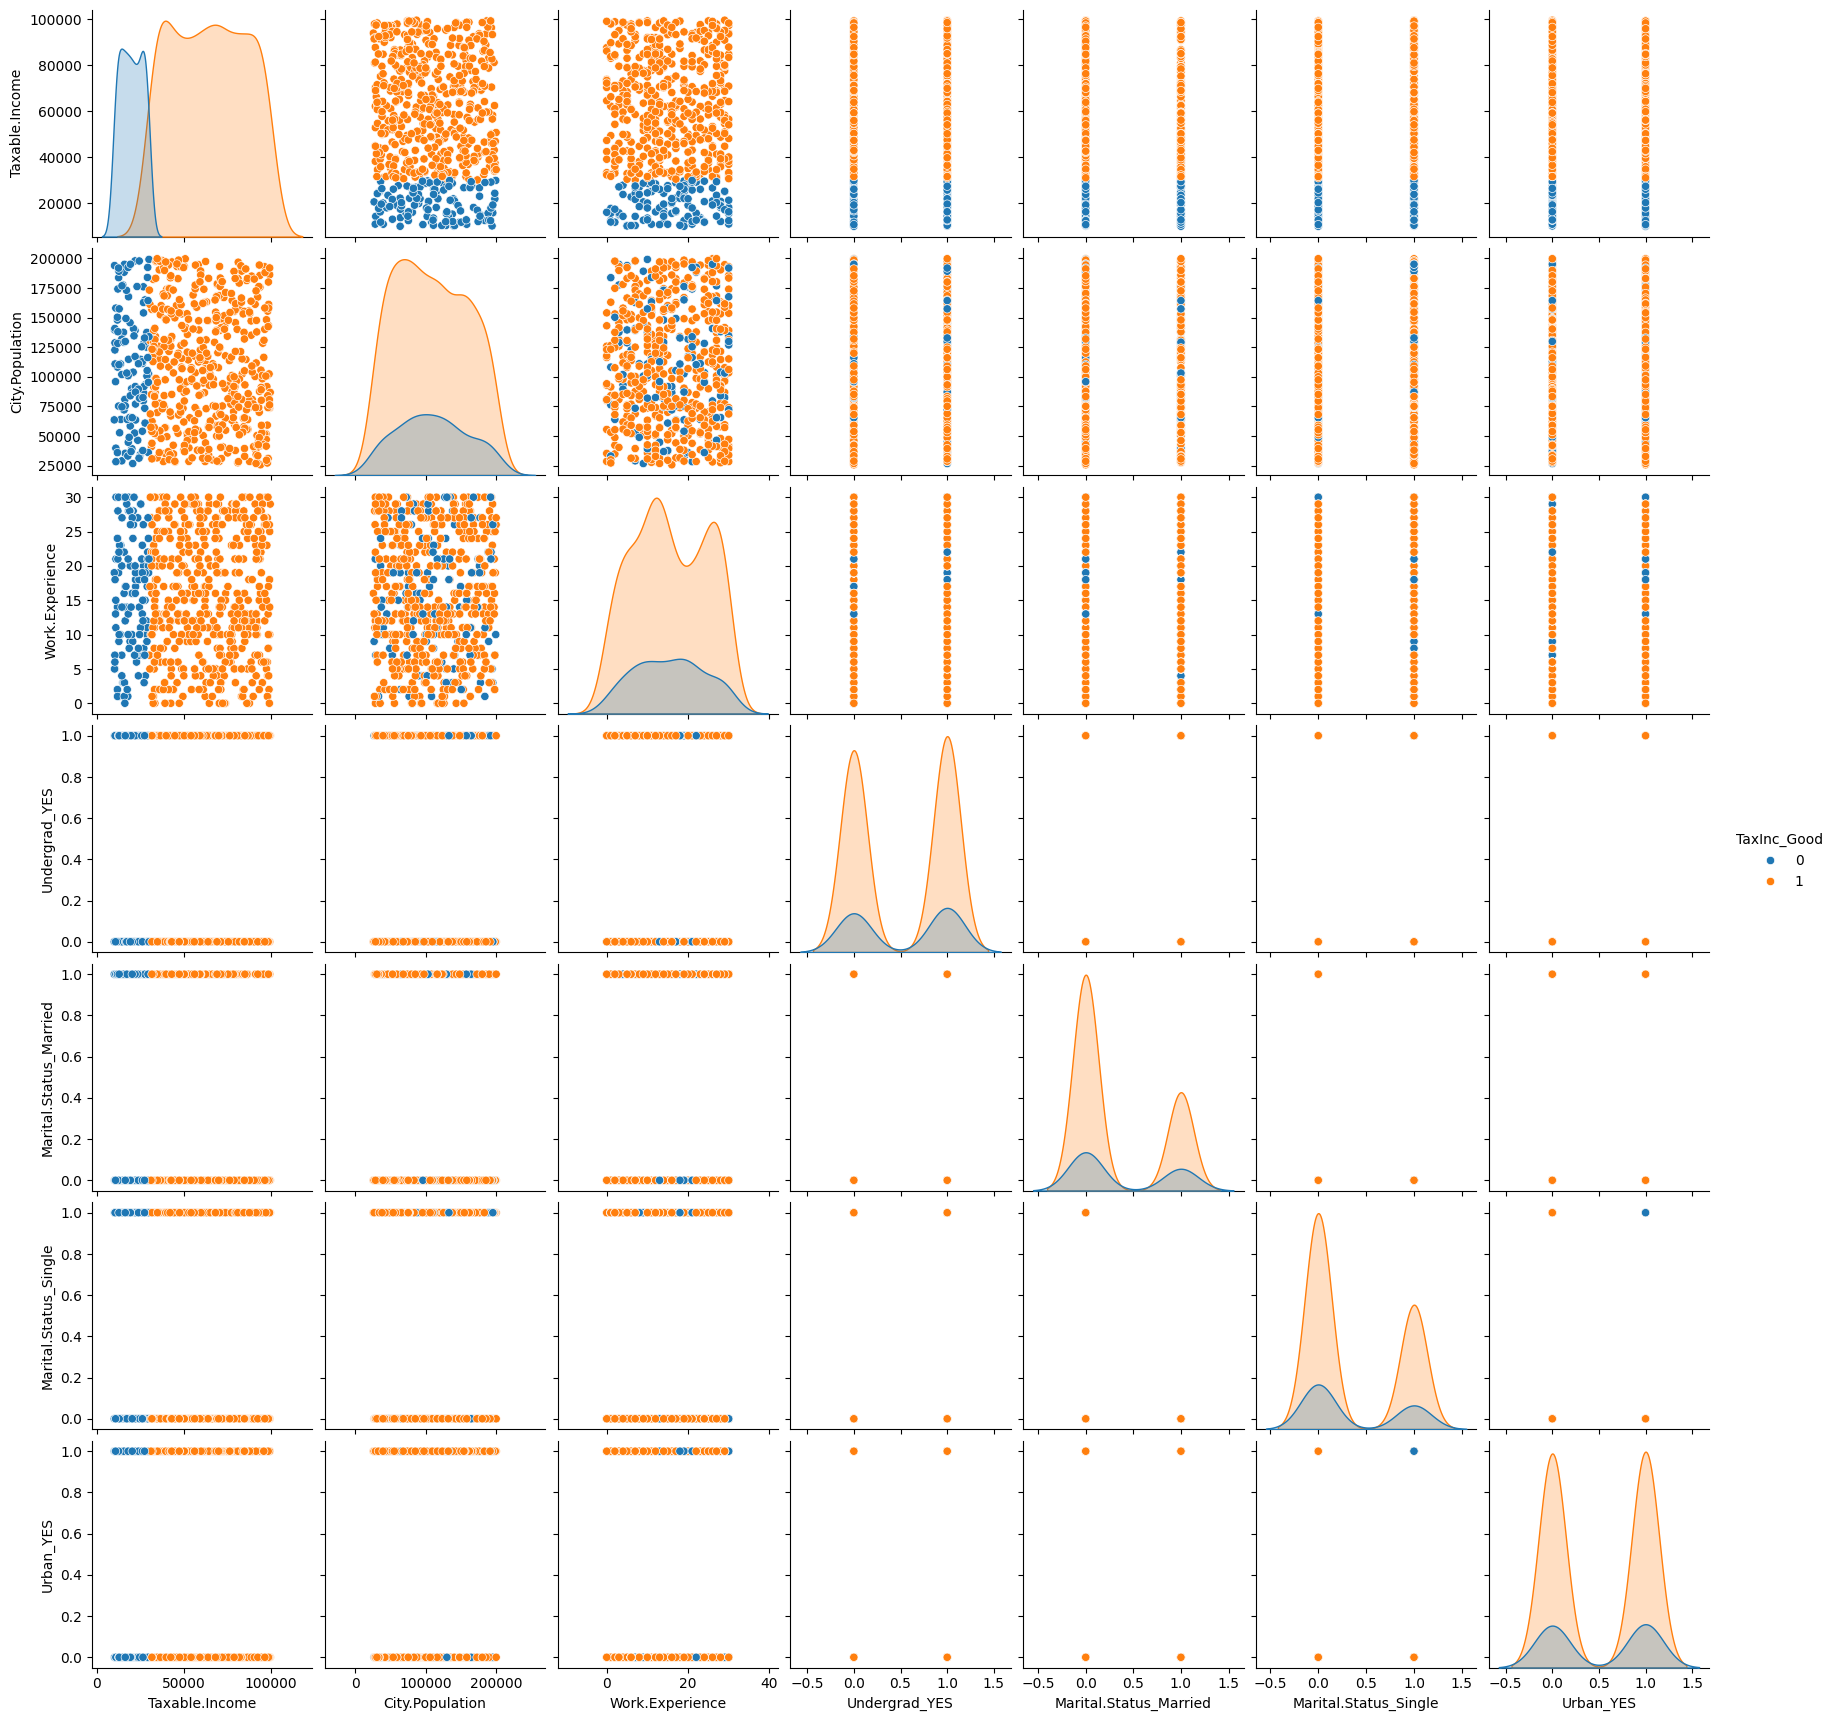

In [73]:
import seaborn as sns
sns.pairplot(data=df, hue = 'TaxInc_Good')


In [74]:
# Declaring features & target
x= df.drop(['TaxInc_Good'], axis=1)
y = df['TaxInc_Good']


In [75]:
y

0      1
1      1
2      1
3      1
4      1
      ..
595    1
596    1
597    1
598    1
599    1
Name: TaxInc_Good, Length: 600, dtype: uint8

In [76]:
from sklearn.model_selection import train_test_split


In [77]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=0)


In [78]:
##Converting the Taxable income variable to bucketing.
df["income"]="<=30000"
df.loc[df["Taxable.Income"]>=30000,"income"]="Good"
df.loc[df["Taxable.Income"]<=30000,"income"]="Risky"


In [79]:
df.columns

Index(['Taxable.Income', 'City.Population', 'Work.Experience', 'Undergrad_YES',
       'Marital.Status_Married', 'Marital.Status_Single', 'Urban_YES',
       'TaxInc_Good', 'income'],
      dtype='object')

In [80]:
df.drop(["Taxable.Income"],axis=1,inplace=True)


In [81]:
features = df.iloc[:,0:5]
labels = df.iloc[:,5]


In [82]:
colnames = list(df.columns)
predictors = colnames[0:5]
target = colnames[5]


In [83]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(features,labels,test_size = 0.2,stratify = labels)


In [84]:
##Model building
from sklearn.ensemble import RandomForestClassifier as RF
model = RF(n_jobs = 3,n_estimators = 15, oob_score = True, criterion = "entropy")
model.fit(x_train,y_train)


RandomForestClassifier(criterion='entropy', n_estimators=15, n_jobs=3,
                       oob_score=True)

In [85]:
model.n_outputs_

1

In [86]:
model.oob_score_


0.5583333333333333

In [87]:
##Predictions on train data
prediction = model.predict(x_train)


In [88]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_train,prediction)

In [89]:
np.mean(prediction == y_train)


0.9770833333333333

In [90]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_train,prediction)


In [91]:
pred_test = model.predict(x_test)


In [92]:
acc_test =accuracy_score(y_test,pred_test)


In [93]:
from sklearn.tree import export_graphviz
import pydotplus
from six import StringIO


In [94]:
tree = model.estimators_[5]


In [95]:
dot_data = StringIO()
export_graphviz(tree,out_file = dot_data, filled = True,rounded = True, feature_names = predictors ,class_names = target,impurity =False)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())


In [96]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [97]:
from sklearn import tree


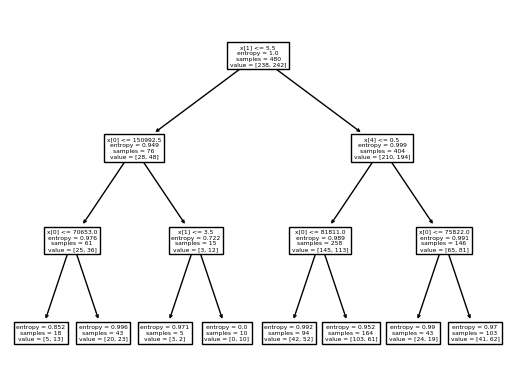

In [98]:
tree.plot_tree(model);


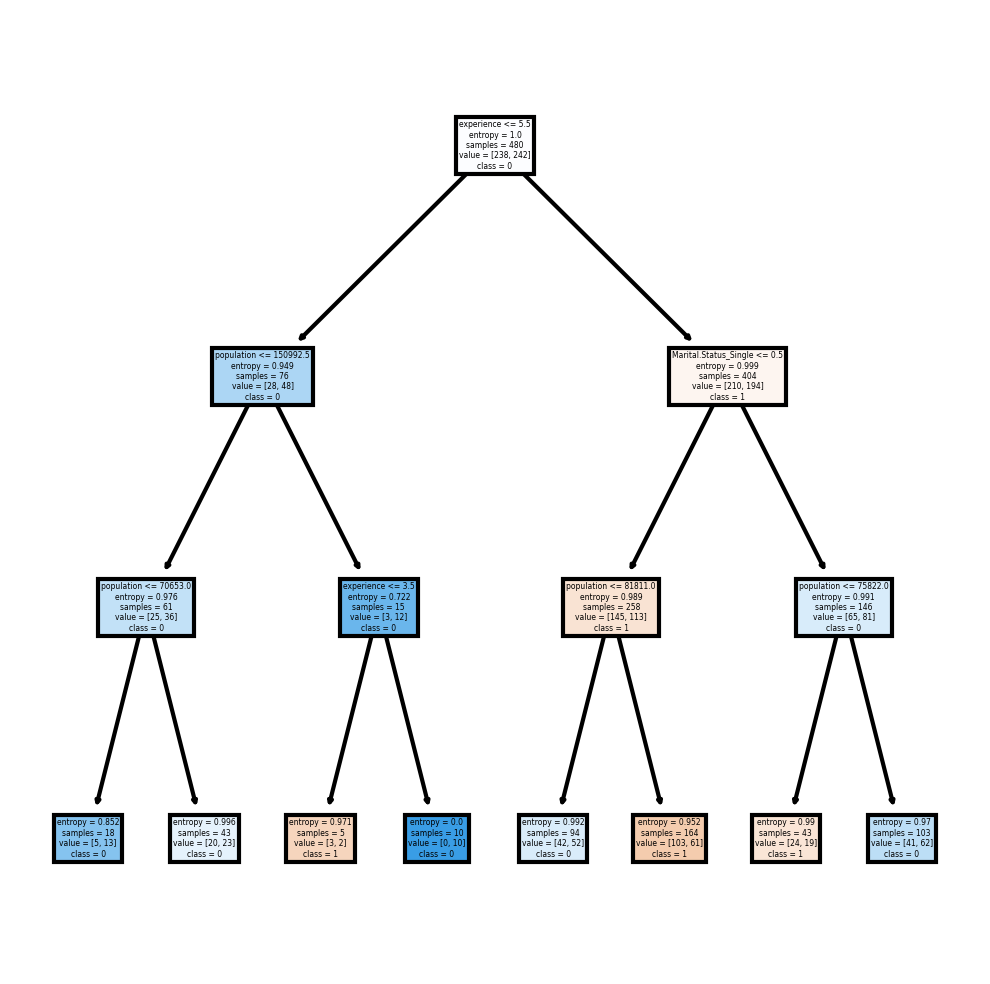

In [99]:
fn=['population','experience','Undergrad_YES','Marital.Status_Married','Marital.Status_Single','Urban_YES']
cn=['1', '0']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn,
               class_names=cn,
               filled = True);

In [100]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set
pd.Series(preds).value_counts() # getting the count of each category


1    64
0    56
dtype: int64

In [101]:
preds

array([0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1], dtype=uint8)

In [102]:
pd.crosstab(y_test,preds)

col_0       0   1
Urban_YES        
0          28  32
1          28  32

In [103]:

np.mean(preds==y_test)


0.5

Building Decision Tree Classifier (CART) using Gini Criteria


In [104]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)


In [105]:
model_gini.fit(x_train, y_train)


DecisionTreeClassifier(max_depth=3)

In [106]:
#Prediction and computing the accuracy
pred=model.predict(x_test)
np.mean(preds==y_test)


0.5

Decision Tree Regression Example


In [107]:
from sklearn.tree import DecisionTreeRegressor

In [108]:
array = df.values
X = array[:,0:3]
y = array[:,3]


In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [110]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)


DecisionTreeRegressor()

In [111]:
model.score(X_test,y_test)


-0.9855410447761197

In [112]:
!pip install xgboost

In [113]:
# First XGBoost model for Pima Indians dataset
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from pandas import read_csv


In [114]:
# split data into train and test sets
seed = 42
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [115]:
# fit model no training data
model = XGBClassifier(max_depth =6, n_estimators=500, learning_rate=0.03,gamma=0.5, objective='binary:logistic')
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.5, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.03, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [116]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [117]:
# evaluate predictions
accuracy =accuracy_score(y_pred, predictions)
print("Accuracy: %.2f" % (accuracy * 100.0))


Accuracy: 100.00


In [118]:
predictions

[1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [119]:
import numpy as np
import matplotlib.pyplot as plt

In [121]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [122]:
!pip install lightgbm

In [123]:
import lightgbm as lgb
d_train = lgb.Dataset(x_train, label=y_train)

In [124]:
params = {}
params['learning_rate'] = 0.003
params['boosting_type'] = 'gbdt'
params['objective'] = 'binary'
params['metric'] = 'binary_logloss'
params['sub_feature'] = 0.5
params['num_leaves'] = 10
params['min_data'] = 50
params['max_depth'] = 10

In [125]:
clf = lgb.train(params, d_train, 500)

[LightGBM] [Info] Number of positive: 152, number of negative: 298
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000055 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 184
[LightGBM] [Info] Number of data points in the train set: 450, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.337778 -> initscore=-0.673213
[LightGBM] [Info] Start training from score -0.673213
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

In [126]:
#Prediction
Y_Pred=clf.predict(X_test)

In [127]:
predictions = [round(value) for value in y_pred]

In [128]:
predictions

[1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0]